In [1]:
import os
import numpy as np
from datetime import datetime

from osgeo import gdal

### Define class to load tiff

In [2]:
class PERSIANN():
    def __init__(self, tif_file_path):
        self.tif_file_path = tif_file_path
        self.array = self._get_array_from_tif()
        self.date = datetime.strptime(os.path.basename(tif_file_path)[11:19], "%Y%m%d").date()
        
    def _get_array_from_tif(self):
        ds = gdal.Open(self.tif_file_path)
        band = ds.GetRasterBand(1)
        arr = band.ReadAsArray()
        return arr

### Declare vairable with tiff directory and example tiff path

In [3]:
tif_data_directory = "prediction_data/precipitation/precipitaciones_maldonado"
tif_data_file = os.path.join(tif_data_directory, "PERSIANN_1d20161101.tif")

### Get and plot all precipitations in Laguna del Sauce

In [4]:
all_precipitation_files = [os.path.join(tif_data_directory, f) for f in os.listdir(tif_data_directory) if f.endswith(".tif")]

precipitation_data = []
for tif_file in all_precipitation_files:
    precipitation_data.append(PERSIANN(tif_file))

In [8]:
import pandas as pd

output = []
for p in precipitation_data:
    precipitation = p.array[-1,1]
    if precipitation > 99: continue
    output.append({"precipitation": precipitation, "date":p.date})
    
precipitation_df = pd.DataFrame(output).sort_values(by="date")

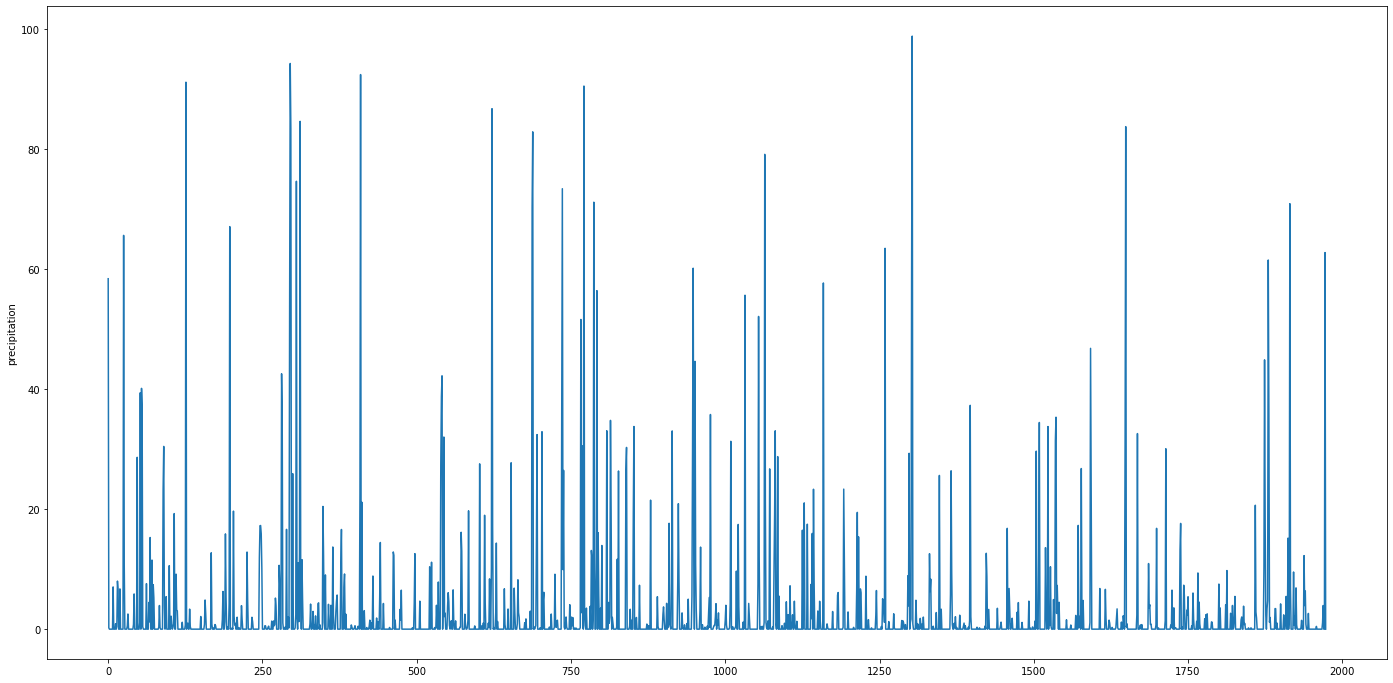

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
plt.plot(precipitation_df["precipitation"].values)
plt.ylabel('precipitation')
plt.show()

### Save precipitation and date in CSV

In [7]:
precipitation_df.to_csv("prediction_data/precipitation/precipitation.csv")